In [72]:
#Import all needed Packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [73]:
#Set path to .csv file
IMDB_df = pd.read_csv('IMDB_Horror_Movies.csv')
IMDB_df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [74]:

IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3328 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Date       3328 non-null   object 
 3   Release Country    3328 non-null   object 
 4   Movie Rating       1451 non-null   object 
 5   Review Rating      3076 non-null   float64
 6   Movie Run Time     2784 non-null   object 
 7   Plot               3327 non-null   object 
 8   Cast               3314 non-null   object 
 9   Language           3257 non-null   object 
 10  Filming Locations  2096 non-null   object 
 11  Budget             1234 non-null   object 
dtypes: float64(1), object(11)
memory usage: 312.1+ KB


In [75]:
# Clean .csv file
## Split out release month and release year
IMDB_df['Release Year'] = pd.DatetimeIndex(IMDB_df['Release Date']).year
IMDB_df['Release Month'] = pd.DatetimeIndex(IMDB_df['Release Date']).month_name()
IMDB_df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Release Year,Release Month
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,October
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,January
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,October
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,April
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,April


In [76]:
## Drop release date column now that month and year have been separated and drop plot and cast columns which aren't needed for analysis and put in new dataframe
## THIS DATASET HAS SEVERAL NULL VALUES BUT GIVES US LARGEST AMOUNT OF DATA TO USE FOR ANALYSIS
IMDB_Clean_R1 = IMDB_df.drop(columns=['Release Date', 'Plot', 'Cast'])
IMDB_Clean_R1.head()

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Language,Filming Locations,Budget,Release Year,Release Month
0,Gut (2012),Drama| Horror| Thriller,USA,NaN,3.9,91 min,English,"New York, USA",NaN,2012,October
1,The Haunting of Mia Moss (2017),Horror,USA,NaN,NaN,NaN,English,NaN,"$30,000",2017,January
2,Sleepwalking (2017),Horror,Canada,NaN,NaN,NaN,English,"Sudbury, Ontario, Canada",NaN,2017,October
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,NOT RATED,3.7,82 min,English,"Baltimore, Maryland, USA",NaN,2013,April
4,Infidus (2015),Crime| Drama| Horror,USA,NaN,5.8,80 min,Italian,NaN,NaN,2015,April


In [77]:
IMDB_Clean_R1.info()
IMDB_Clean_R1["Release Year"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3328 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Country    3328 non-null   object 
 3   Movie Rating       1451 non-null   object 
 4   Review Rating      3076 non-null   float64
 5   Movie Run Time     2784 non-null   object 
 6   Language           3257 non-null   object 
 7   Filming Locations  2096 non-null   object 
 8   Budget             1234 non-null   object 
 9   Release Year       3328 non-null   int64  
 10  Release Month      3328 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 286.1+ KB


array([2012, 2017, 2013, 2015, 2014, 2016], dtype=int64)

In [78]:
## Create new dataframe out of clean dataframe that drops any rows with null values
## THIS IS CLEANEST DATASET BUT ANALYSIS RESULTS WILL BE LIMITED DUE TO SIZE
IMDB_Clean_R2 = IMDB_Clean_R1.dropna()
IMDB_Clean_R2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 11 to 3326
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              475 non-null    object 
 1   Genres             475 non-null    object 
 2   Release Country    475 non-null    object 
 3   Movie Rating       475 non-null    object 
 4   Review Rating      475 non-null    float64
 5   Movie Run Time     475 non-null    object 
 6   Language           475 non-null    object 
 7   Filming Locations  475 non-null    object 
 8   Budget             475 non-null    object 
 9   Release Year       475 non-null    int64  
 10  Release Month      475 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 44.5+ KB


In [79]:
#How many films were released in each country over the time period?
IMDB_Clean_R1["Release Country"].value_counts()
              

USA             2092
UK               218
India            107
Japan             98
Philippines       68
                ... 
Bolivia            1
South Africa       1
Greece             1
Cambodia           1
Qatar              1
Name: Release Country, Length: 72, dtype: int64

In [80]:
#Created dataframe that only includes movies released in the USA
USA_df = IMDB_Clean_R1[IMDB_Clean_R1["Release Country"].str.contains("USA")]
USA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 3327
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2092 non-null   object 
 1   Genres             2091 non-null   object 
 2   Release Country    2092 non-null   object 
 3   Movie Rating       1071 non-null   object 
 4   Review Rating      1915 non-null   float64
 5   Movie Run Time     1773 non-null   object 
 6   Language           2043 non-null   object 
 7   Filming Locations  1435 non-null   object 
 8   Budget             834 non-null    object 
 9   Release Year       2092 non-null   int64  
 10  Release Month      2092 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 196.1+ KB


In [81]:
USA_df.head()

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Language,Filming Locations,Budget,Release Year,Release Month
0,Gut (2012),Drama| Horror| Thriller,USA,NaN,3.9,91 min,English,"New York, USA",NaN,2012,October
1,The Haunting of Mia Moss (2017),Horror,USA,NaN,NaN,NaN,English,NaN,"$30,000",2017,January
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,USA,NOT RATED,3.7,82 min,English,"Baltimore, Maryland, USA",NaN,2013,April
4,Infidus (2015),Crime| Drama| Horror,USA,NaN,5.8,80 min,Italian,NaN,NaN,2015,April
6,Ghostlight (2013),Drama| Horror| Thriller,USA,NOT RATED,5.1,90 min,English,NaN,NaN,2014,June


In [82]:
# visualization comparing review rating to budget
## first create a dataframe that only includes budget and review rating and drop rows with null values
budget_df = USA_df.loc[:, ["Title", "Review Rating", "Budget"]].dropna()
budget_df

,Title,Review Rating,Budget
11,Rise of the Animals (2011),3.6,"$7,000"
14,Sexy Durga (2017),5.9,"INR 6,000,000"
15,Circus of the Dead (2014),6.0,"$150,000"
22,Apparition (2015),4.0,"$3,000,000"
25,2: Voodoo Academy (2012),4.5,"$1,000,000"
...,...,...,...
3316,Odd Thomas (2013),6.9,"$27,000,000"
3317,Clown (2014),5.7,"$1,500,000"
3319,Insidious: Chapter 3 (2015),6.1,"$10,000,000"
3320,The Purge (2013),5.7,"$3,000,000"


In [83]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 11 to 3323
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          769 non-null    object 
 1   Review Rating  769 non-null    float64
 2   Budget         769 non-null    object 
dtypes: float64(1), object(2)
memory usage: 24.0+ KB


In [84]:
budget_df.sort_values(by=['Budget'], inplace=True)
budget_df.head(95)

,Title,Review Rating,Budget
3257,Killing Ground (2016),5.8,"AUD 1,300,000"
264,Love of my Life (2013),3.4,"AUD 150,000"
316,Bad Behaviour (2010),3.9,"AUD 500,000"
1825,Daddy's Little Girl (2012),5.8,"AUD 500,000"
1038,Sleeper (2012),3.9,"AUD 800,000"
...,...,...,...
1320,Scars of Xavier (2017),8.5,"€80,000"
1040,Dark Prism (2015),4.0,"$1,000"
1167,The Plague (2016),7.8,"$1,000"
1744,Vile Prey (2016),8.8,"$1,000"


In [85]:
# Remove the rows where the budget is not is USD
budget_filtered_df = budget_df[budget_df["Budget"].str.contains("AUD|BRL|CAD|HKD|INR|MXN|NOK|NZD|RUR|SEK|£|€")==False]
budget_filtered_df.head(20)

,Title,Review Rating,Budget
1040,Dark Prism (2015),4.0,"$1,000"
1167,The Plague (2016),7.8,"$1,000"
1744,Vile Prey (2016),8.8,"$1,000"
530,Vamp Bikers Tres (2016),7.2,"$1,000"
265,Scream: Generations (2012),7.1,"$1,000"
1093,House of Whores (2015),7.5,"$1,000"
1648,Black Eyed Children: Let Me In (2015),3.0,"$1,000"
625,Blessed Are the Children (2016),7.7,"$1,000"
500,Shockwave (2016),7.8,"$1,000"
45,Turned (2015),7.3,"$1,000"


In [86]:
# Change budget column datatype to numeric - remove dollar signs and commas from values, put in new list
budget_filtered_df["Budget"].reset_index(drop=True)
budget_list = []
for x in budget_filtered_df["Budget"]:
        temp = x.replace("$", "")
        temp = temp.replace(",", "")
        temp = int(temp)
        budget_list.append(temp)
        
print(budget_list)

print(budget_filtered_df.head())


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1100000, 1200, 1200000, 1200000, 1200000, 1200000, 1200000, 1200000, 1200000, 1200000, 1250, 1250, 1250000, 1300, 1300000, 1400, 1400000, 1500, 1500, 1500, 1500, 1500, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1600000, 1600000, 1675000, 1700000, 1750000, 1750000, 1800000, 1950000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10

In [87]:
# create new dataframe off of old dataframe that removes old budget column and puts in new budget column
budget_filtered_df["Budget USD"] = budget_list

budget_USD_df = budget_filtered_df.drop(columns="Budget")

budget_USD_df.sort_values(by=["Budget USD"], ascending=False, inplace=True)

budget_USD_df

C:\Users\rjosa\AppData\Local\Temp\ipykernel_2944\502050925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_filtered_df["Budget USD"] = budget_list


,Title,Review Rating,Budget USD
2981,World War Z (2013),7.0,190000000
3252,Dark Shadows (2012),6.2,150000000
3303,Alien: Covenant (2017),6.5,97000000
3076,Hotel Transylvania (2012),7.1,85000000
3312,Dracula Untold (2014),6.3,70000000
...,...,...,...
1333,Slash 2 (2014),7.6,500
1295,Dark Shade Creek (2012),3.8,500
309,The Beckoning (2013),5.8,300
2863,The Grinn (2017),5.2,300


In [88]:
mean_budget = budget_USD_df["Budget USD"].mean()
print(f"The mean budget is {mean_budget}.")

median_budget = budget_USD_df["Budget USD"].median()
print(f"The median budget is {median_budget}.")

min_budget = budget_USD_df["Budget USD"].min()
print(f"The lowest budget is {min_budget}.")

max_budget = budget_USD_df["Budget USD"].max()
print(f"The highest budget is {max_budget}.")

lowest_budget_film = budget_USD_df.loc[budget_USD_df["Budget USD"] == min_budget]["Title"]
print(f"The film with the lowest budget is {lowest_budget_film}.")

highest_budget_film = budget_USD_df.loc[budget_USD_df["Budget USD"] == max_budget]["Title"]
print(f"The film with the highest budget is {highest_budget_film}.")

The mean budget is 4608741.949852508.
The median budget is 355000.0.
The lowest budget is 100.
The highest budget is 190000000.
The film with the lowest budget is 507    Catalina (2016)
Name: Title, dtype: object.
The film with the highest budget is 2981    World War Z (2013)
Name: Title, dtype: object.


In [89]:
# Print info for the highest and lowest budget films
print(USA_df.loc[507])
print(f"_________________________________________________________________")
print(USA_df.loc[2981])

Title                              Catalina (2016)
Genres                                      Horror
Release Country                                USA
Movie Rating                                   NaN
Review Rating                                  3.3
Movie Run Time                              45 min
Language                                   English
Filming Locations    Fort Lauderdale, Florida, USA
Budget                                       $100 
Release Year                                  2016
Release Month                             December
Name: 507, dtype: object
_________________________________________________________________
Title                                          World War Z (2013)
Genres                Action| Adventure| Horror| Sci-Fi| Thriller
Release Country                                               USA
Movie Rating                                                PG-13
Review Rating                                                 7.0
Movie Run Time    

C:\Users\rjosa\AppData\Local\Temp\ipykernel_2944\2686713633.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


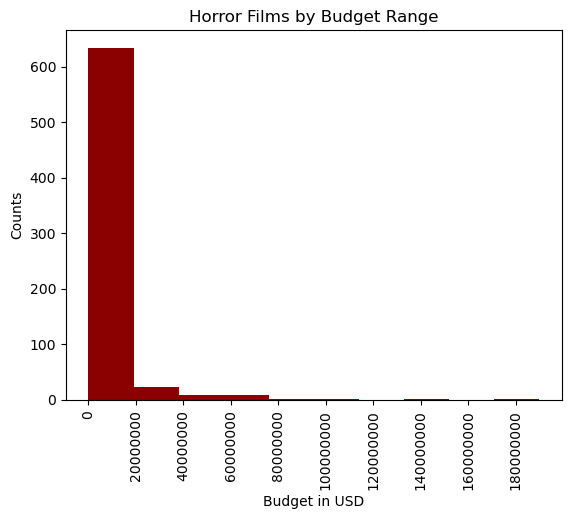

NormaltestResult(statistic=271.125605615095, pvalue=1.3360502398708906e-59)
The distribution of budgets is not normal.


In [90]:
## Histogram to see ranges of horror film budgets
movie_budgets = budget_USD_df["Budget USD"]
plt.hist(movie_budgets, color="darkred")
plt.title('Horror Films by Budget Range')
plt.xlabel('Budget in USD')
plt.ylabel('Counts')

# modify the xaxis
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20000000))
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.xticks(rotation = 90)

# Save the figure
plt.savefig("budget_hist.png", bbox_inches = 'tight')

plt.show()

print(st.normaltest(movie_budgets.sample(200)))
print(f"The distribution of budgets is not normal.")

C:\Users\rjosa\AppData\Local\Temp\ipykernel_2944\3244585292.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


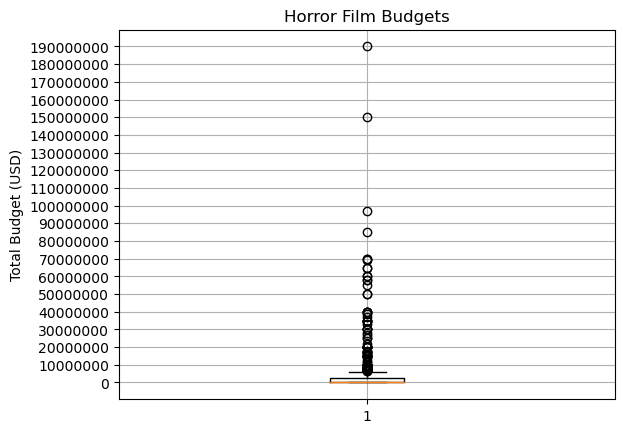

In [91]:
# Create boxplot on budget to indentify potential outliers 
fig1, ax1 = plt.subplots()
ax1.set_title('Horror Film Budgets')
ax1.set_ylabel('Total Budget (USD)')
ax1.boxplot(movie_budgets)
plt.grid()

# modify the yaxis
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10000000))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

# Save the figure
plt.savefig("budget_boxplot.png", bbox_inches = 'tight')

plt.show()

In [92]:
quartiles = movie_budgets.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of budgets is: {lowerq}")
print(f"The upper quartile of budgets is: {upperq}")
print(f"The interquartile range of budgets is: {iqr}")
print(f"The median of budgets is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of budgets is: 25000.0
The upper quartile of budgets is: 2500000.0
The interquartile range of budgets is: 2475000.0
The median of budgets is: 355000.0 
Values below -3687500.0 could be outliers.
Values above 6212500.0 could be outliers.


In [93]:
# identify rows with potential outliers
outliers_df = budget_USD_df.loc[budget_USD_df['Budget USD'] > upper_bound]
outliers_df.head(10)

,Title,Review Rating,Budget USD
2981,World War Z (2013),7.0,190000000
3252,Dark Shadows (2012),6.2,150000000
3303,Alien: Covenant (2017),6.5,97000000
3076,Hotel Transylvania (2012),7.1,85000000
3312,Dracula Untold (2014),6.3,70000000
3090,Underworld Awakening (2012),6.4,70000000
2347,Abraham Lincoln: Vampire Hunter (2012),5.9,69000000
3181,Resident Evil: Retribution (2012),5.4,65000000
3002,"I, Frankenstein (2014)",5.1,65000000
3063,The Dark Tower (2017),5.8,60000000


In [94]:
# Create new dataframe that drops rows with budget outliers over $75MM
Clean_budget_USD_df = budget_USD_df.drop([2981,3252,3303,3076])
Clean_budget_USD_df

,Title,Review Rating,Budget USD
3312,Dracula Untold (2014),6.3,70000000
3090,Underworld Awakening (2012),6.4,70000000
2347,Abraham Lincoln: Vampire Hunter (2012),5.9,69000000
3181,Resident Evil: Retribution (2012),5.4,65000000
3002,"I, Frankenstein (2014)",5.1,65000000
...,...,...,...
1333,Slash 2 (2014),7.6,500
1295,Dark Shade Creek (2012),3.8,500
309,The Beckoning (2013),5.8,300
2863,The Grinn (2017),5.2,300


C:\Users\rjosa\AppData\Local\Temp\ipykernel_2944\603566316.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


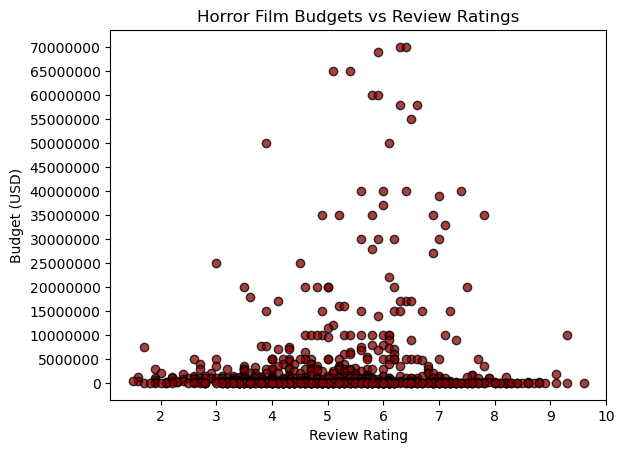

The films with the highest budgets do not necessarily have the highest review ratings.


In [95]:
# Created a scatter plot to compare film budget to review ratings
plt.scatter(Clean_budget_USD_df['Review Rating'], Clean_budget_USD_df['Budget USD'], color="darkred",
            edgecolors="black", alpha=0.75)
plt.xlabel("Review Rating")
plt.ylabel("Budget (USD)")
plt.title("Horror Film Budgets vs Review Ratings")

# modify the yaxis
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5000000))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

# Save the figure
plt.savefig("budget_scatter.png", bbox_inches = 'tight')

plt.show()

print(f"The films with the highest budgets do not necessarily have the highest review ratings.")